## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from datetime import datetime

sns.set_theme()
sns.set_style('darkgrid')

Configs

In [2]:
pd.set_option('display.precision', 2)

## Data Loading

In [3]:
df = pd.read_csv('data/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.20,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.20,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.79,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.51,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.20,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


Multiple dates there but different locations. Seems like the data comprises of cases for each dates and location

Data shape

In [4]:
df.shape

(21759, 38)

Wow lots of entries

Looking at some basic info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

There's quite a lot of null values \
We might have to clean it later

Let's convert the 'Date' feature from object to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

## Data Cleaning

We had quite a lot of null values up there

In [7]:
df[df.columns[(df.isna().any())]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City or Regency              0 non-null      float64
 1   Province                     21117 non-null  object 
 2   Island                       21117 non-null  object 
 3   Time Zone                    21117 non-null  object 
 4   Special Status               3123 non-null   object 
 5   Total Cities                 21145 non-null  float64
 6   Total Urban Villages         21142 non-null  float64
 7   Total Rural Villages         21117 non-null  float64
 8   Growth Factor of New Cases   20572 non-null  float64
 9   Growth Factor of New Deaths  19292 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.7+ MB


I'm gonna drop all these features

In [8]:
df = df.dropna(axis=1)
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.84,-6.20,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.84,-6.20,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.92,-0.79,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,...,69.80,101.81,0.51,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.84,-6.20,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%


There were multiple dates with different location code. Let's check what codes we have

In [9]:
print(df['Location ISO Code'].unique())
print(df['Location ISO Code'].nunique(), 'unique values of Location ISO code')

['ID-JK' 'IDN' 'ID-RI' 'ID-JB' 'ID-BT' 'ID-JT' 'ID-SG' 'ID-BA' 'ID-KI'
 'ID-YO' 'ID-SU' 'ID-JI' 'ID-KR' 'ID-SN' 'ID-JA' 'ID-MA' 'ID-PA' 'ID-MU'
 'ID-SS' 'ID-AC' 'ID-KT' 'ID-LA' 'ID-ST' 'ID-SA' 'ID-SB' 'ID-PB' 'ID-KU'
 'ID-SR' 'ID-KB' 'ID-KS' 'ID-BB' 'ID-BE' 'ID-NB' 'ID-NT' 'ID-GO']
35 unique values of Location ISO code


In [10]:
df['Location Level'].unique()

array(['Province', 'Country'], dtype=object)

Yup we definitely have data for each region. I see that there's an 'IDN' over there, which is the ISO code for 'Indonesia'. Seems like that one is to identify cases for the whole country, while the rest is on a provincial scale

We're gonna separate the df for country level and province level

In [11]:
df_idn = df[df['Location Level'] == 'Country'].sort_values(by='Date').reset_index(drop=True)
df_idn.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.92,-0.79,0.01,0.01,0.0,0.0,0.0,0.00%,0.00%
1,2020-03-03,IDN,Indonesia,0,0,0,0,2,0,0,...,138.34,113.92,-0.79,0.00,0.01,0.0,0.0,0.0,0.00%,0.00%
2,2020-03-04,IDN,Indonesia,0,0,0,0,2,0,0,...,138.34,113.92,-0.79,0.00,0.01,0.0,0.0,0.0,0.00%,0.00%
3,2020-03-05,IDN,Indonesia,0,0,0,0,2,0,0,...,138.34,113.92,-0.79,0.00,0.01,0.0,0.0,0.0,0.00%,0.00%
4,2020-03-06,IDN,Indonesia,2,0,0,2,4,0,0,...,138.34,113.92,-0.79,0.01,0.02,0.0,0.0,0.0,0.00%,0.00%


In [12]:
df_provs = df[df['Location Level'] == 'Province'].sort_values(by=['Location ISO Code', 'Date']).reset_index(drop=True)
df_provs.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,2020-03-26,ID-AC,Aceh,1,0,0,1,1,0,0,...,90.54,96.91,4.23,0.19,0.19,0.0,0.0,0.0,0.00%,0.00%
1,2020-03-27,ID-AC,Aceh,3,0,0,3,4,0,0,...,90.54,96.91,4.23,0.57,0.76,0.0,0.0,0.0,0.00%,0.00%
2,2020-03-28,ID-AC,Aceh,1,0,0,1,5,0,0,...,90.54,96.91,4.23,0.19,0.95,0.0,0.0,0.0,0.00%,0.00%
3,2020-03-29,ID-AC,Aceh,0,0,0,0,5,0,0,...,90.54,96.91,4.23,0.00,0.95,0.0,0.0,0.0,0.00%,0.00%
4,2020-03-30,ID-AC,Aceh,0,0,0,0,5,0,0,...,90.54,96.91,4.23,0.00,0.95,0.0,0.0,0.0,0.00%,0.00%


## Data Exploration

Let's look at some basic stats

In [13]:
df_idn.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb
count,642.00,642.00,642.00,642.00,6.42e+02,642.00,6.42e+02,642.00,642.0,642.0,6.42e+02,6.42e+02,642.00,6.42e+02,642.00,642.00,642.00,642.00,642.00,642.00
mean,6631.22,224.08,6395.14,12.00,1.45e+06,44763.92,1.30e+06,100661.91,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,25.01,5457.41,0.85,168.80,16.88
std,9556.02,359.86,9052.20,4862.28,1.52e+06,49183.59,1.43e+06,119600.85,0.0,0.0,0.00e+00,0.00e+00,0.00,1.42e-14,0.00,36.04,5713.98,1.36,185.47,18.55
min,0.00,0.00,0.00,-25725.00,2.00e+00,0.00,0.00e+00,2.00,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,0.00,0.01,0.00,0.00,0.00
25%,1044.25,47.25,889.75,-619.75,1.26e+05,5733.50,8.13e+04,22633.75,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,3.94,474.45,0.18,21.62,2.16
50%,4070.50,112.00,3855.00,118.50,9.02e+05,25877.00,7.32e+05,63252.50,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,15.35,3402.47,0.42,97.59,9.76
75%,6737.75,193.75,6976.75,639.75,2.09e+06,56639.50,1.84e+06,123868.00,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,25.41,7876.33,0.73,213.58,21.36
max,56757.00,2069.00,48832.00,36726.00,4.26e+06,143858.00,4.11e+06,574135.00,416.0,7230.0,1.92e+06,2.65e+08,138.34,1.14e+02,-0.79,214.03,16053.83,7.80,542.48,54.25


In [14]:
df_provs.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb
count,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,2.11e+04,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00,21117.00
mean,201.59,6.81,194.36,0.42,43853.42,1367.89,39467.44,3018.09,12.25,213.42,56345.86,7.89e+06,763.43,113.67,-2.79,29.53,6205.73,0.85,163.38,16.34
std,665.41,26.52,704.12,432.90,110094.28,3727.12,103545.21,8044.88,7.37,169.36,60153.38,1.09e+07,2782.53,10.01,3.65,70.71,10394.99,2.30,256.00,25.60
min,0.00,0.00,0.00,-15797.00,1.00,0.00,0.00,-2306.00,1.00,44.00,664.00,6.48e+05,8.59,96.91,-8.68,0.00,0.02,0.00,0.00,0.00
25%,6.00,0.00,4.00,-15.00,1685.00,46.00,949.00,172.00,7.00,103.00,16787.00,2.00e+06,47.79,106.11,-6.20,1.70,413.32,0.00,10.60,1.06
50%,38.00,1.00,29.00,0.00,10245.00,261.00,8167.00,849.00,11.00,169.00,38744.00,4.22e+06,103.84,112.73,-2.99,8.00,2706.83,0.16,73.18,7.32
75%,133.00,4.00,126.00,25.00,34118.00,949.00,30240.00,2398.00,15.00,241.00,72981.00,8.22e+06,262.70,121.20,0.21,26.30,7364.18,0.75,195.47,19.55
max,14622.00,544.00,20602.00,9537.00,864045.00,30225.00,849875.00,118018.00,29.00,666.00,319036.00,4.52e+07,16334.31,138.70,4.23,1348.13,79663.79,63.80,1533.98,153.40


In [15]:
df_idn.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level', 'Country',
       'Continent', 'Total Regencies', 'Total Districts', 'Area (km2)',
       'Population', 'Population Density', 'Longitude', 'Latitude',
       'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate'],
      dtype='object')

Looking at the features, seems like there are 4 features for daily changes of data, which are

In [16]:
col_daily = df_idn.columns[3:7]
col_daily

Index(['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases'], dtype='object')

For now, let's focus our EDA on these 4 datas first

### Single Sample Hypothesis Testing

The new cases in Indonesia on average is 6631 daily and during the last hundred days, we average 2304 new cases a day. Does that mean the number of new cases have decreased significantly?

In [17]:
idn_newcases_sample_mean = df_idn["New Cases"].iloc[-100:].mean()
idn_newcases_pop_mean = df_idn['New Cases'].mean()

print(f'Average new cases a day for the last hundred days: {idn_newcases_sample_mean:.0f}')
print(f"Average new cases a day for the whole population: {idn_newcases_pop_mean:.0f}")

Average new cases a day for the last hundred days: 2304
Average new cases a day for the whole population: 6631


We will perform single sample one sided and set the significance level of `0.05`. \
We use test a variable and compare the sample (last hundred days) and the population (around 600 days)

Hypothesis:
- $ H_{0}: \mu \geq 6631 $
- $ H_{1}: \mu < 6631 $

In [18]:
df_idn[['Date', 'New Cases']].iloc[-100:]

,Date,New Cases
542,2021-08-26,16899
543,2021-08-27,12618
544,2021-08-28,10050
545,2021-08-29,7427
546,2021-08-30,5436
...,...,...
637,2021-11-29,176
638,2021-11-30,297
639,2021-12-01,278
640,2021-12-02,311


In [19]:
t_stat, p_val = stats.ttest_1samp(df_idn['New Cases'].iloc[-100:], idn_newcases_pop_mean)
print(f'p-value: {p_val / 2}')
print(f't-statistics: {t_stat}')

p-value: 8.582026433052194e-26
t-statistics: -14.13814322069602


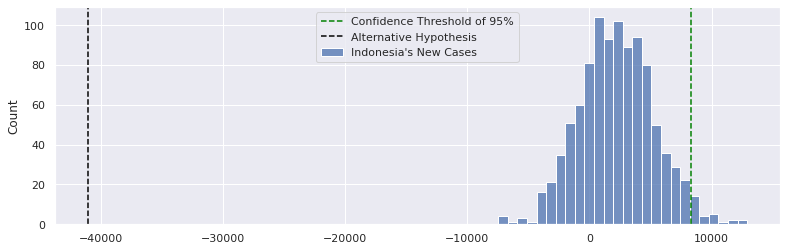

In [20]:
idn_newcases_pop = np.random.normal(
    idn_newcases_sample_mean,
    df_idn['New Cases'].iloc[-100:].std(),
    1000
)

ci = stats.norm.interval(
    0.95,
    idn_newcases_sample_mean,
    df_idn['New Cases'].iloc[-100:].std(),
)

plt.figure(figsize=(13, 4))
sns.histplot(idn_newcases_pop, label='Indonesia\'s New Cases')
plt.axvline(ci[1], color='green', linestyle='dashed', label='Confidence Threshold of 95%')
plt.axvline(idn_newcases_pop.mean() + t_stat*idn_newcases_pop.std(), color='black', linestyle='dashed', label='Alternative Hypothesis')

plt.legend()
plt.show()

**Since our p-value is less than `0.05`, we reject the null hypothesis** and conclude that the average new cases has decreased significantly compared to the whole 600 days

### Two Samples Independent Two Tailed Hypothesis Testing

Check whether daily average of new cases of two provinces are significantly different. We will pick sample of Sumatera Utara and Sumatera Barat

In [21]:
newcases_su = df_provs[df_provs['Location ISO Code'] == 'ID-SU']['New Cases']
newcases_sb = df_provs[df_provs['Location ISO Code'] == 'ID-SB']['New Cases']

print(f"Average of new cases in Sumatera Utara a day: {newcases_su.mean():.0f}")
print(f"Average of new cases in Sumatera Barat a day: {newcases_sb.mean():.0f}")

Average of new cases in Sumatera Utara a day: 169
Average of new cases in Sumatera Barat a day: 146


Hypothesis:
- $ H_{0}: \mu\ _\text{Sumatera Utara} = \mu\ _\text{Sumatera Barat} $
- $ H_{1}: \mu\ _\text{Sumatera Utara} \neq \mu\ _\text{Sumatera Barat} $

In [22]:
t_stat, p_val = stats.ttest_ind(newcases_su, newcases_sb)
print(f'p-value: {p_val}')
print(f't-statistics: {t_stat}')

p-value: 0.1076920116848577
t-statistics: 1.6098175500590197


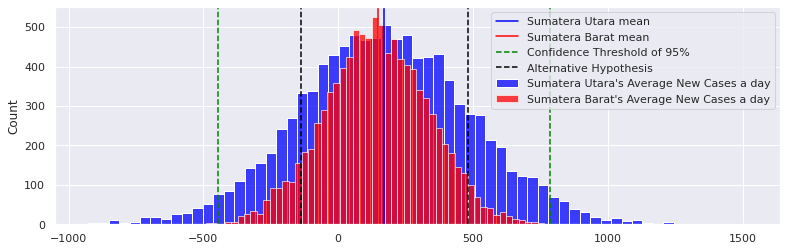

In [23]:
newcases_su_pop = np.random.normal(newcases_su.mean(), newcases_su.std(), 10000)
newcases_sb_pop = np.random.normal(newcases_sb.mean(), newcases_sb.std(), 10000)

ci = stats.norm.interval(0.95, newcases_su.mean(), newcases_su.std())

plt.figure(figsize=(13, 4))

sns.histplot(newcases_su_pop, label="Sumatera Utara's Average New Cases a day", color='blue')
sns.histplot(newcases_sb_pop, label="Sumatera Barat's Average New Cases a day", color='red')

plt.axvline(newcases_su.mean(), color='blue', label='Sumatera Utara mean')
plt.axvline(newcases_sb.mean(), color='red', label='Sumatera Barat mean')

plt.axvline(ci[1], color='green', linestyle='dashed', label='Confidence Threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed')

plt.axvline(newcases_su_pop.mean() + t_stat*newcases_sb_pop.std(), color='black', linestyle='dashed', label='Alternative Hypothesis')
plt.axvline(newcases_su_pop.mean() - t_stat*newcases_sb_pop.std(), color='black', linestyle='dashed')

plt.legend()
plt.show()

**Since our p-value is more than `0.05`, we fail reject the null hypothesis** and conclude that the average new cases between Sumatera Utara and Sumatera Barat are not significantly different

### ANOVA

Check whether daily average of new cases of all Sulawesi provinces are significantly different

Hypothesis:
- $ H_{0}: \mu\ _\text{Sulawesi Utara} = \mu\ _\text{Sulawesi Tenggara} = \mu\ _\text{Sulawesi Selatan} = \mu\ _\text{Sulawesi Barat} = \mu\ _\text{Sulawesi Timur} $
- $ H_{1}: \mu\ _\text{Sulawesi Utara} \neq \mu\ _\text{Sulawesi Tenggara} \neq \mu\ _\text{Sulawesi Selatan} \neq \mu\ _\text{Sulawesi Barat} \neq \mu\ _\text{Sulawesi Timur} $

In [24]:
newcases_sa = df_provs[df_provs['Location ISO Code'] == 'ID-SA']['New Cases']
newcases_sg = df_provs[df_provs['Location ISO Code'] == 'ID-SG']['New Cases']
newcases_sn = df_provs[df_provs['Location ISO Code'] == 'ID-SN']['New Cases']
newcases_sr = df_provs[df_provs['Location ISO Code'] == 'ID-SR']['New Cases']
newcases_st = df_provs[df_provs['Location ISO Code'] == 'ID-ST']['New Cases']

print(f"Average of new cases in Sulawesi Utara a day: {newcases_sa.mean():.0f}")
print(f"Average of new cases in Sulawesi Tenggara a day: {newcases_sg.mean():.0f}")
print(f"Average of new cases in Sulawesi Selatan a day: {newcases_sn.mean():.0f}")
print(f"Average of new cases in Sulawesi Barat a day: {newcases_sr.mean():.0f}")
print(f"Average of new cases in Sulawesi Timur a day: {newcases_st.mean():.0f}")

Average of new cases in Sulawesi Utara a day: 56
Average of new cases in Sulawesi Tenggara a day: 32
Average of new cases in Sulawesi Selatan a day: 176
Average of new cases in Sulawesi Barat a day: 20
Average of new cases in Sulawesi Timur a day: 76


In [25]:
f_stat, p_val = stats.f_oneway(newcases_sa, newcases_sg, newcases_sn, newcases_sr, newcases_st)
print(f'p-value: {p_val}')

p-value: 3.122467287064014e-98


**Since the p-value is more than `0.05`, we fail to reject the null hypothesis** and conclude that the average new cases between all the Sulawesi provinces are not significantly different